In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
plt.rcParams["font.family"] = "Times New Roman"

In [16]:
algo = 'lasso'

In [17]:
all_n = list(os.walk(algo + '_result/'))[0][1]
data = pd.DataFrame()
for n in tqdm(all_n):
    all_d = list(os.walk(algo + '_result/'+n))[0][1]
    n=n[2:]
    for d in all_d:
        d=d[2:]
        t_list=[]
        t_list_v=[]
        count = 0
        for lp in range(1,101):
            try:
                temp=np.load(algo + '_result/n_'+n+'/d_'+d+'/tauto_n' + n + '_d' + d + '_' + str(lp) + '.npy', allow_pickle=True) 
                t_list.append(temp.item()['t_auto'])
                t_list_v.append(temp.item()['t_auto_v'])
                count+=1     
            except:
                continue
        plt.figure()
        plt.hist(t_list)
        plt.savefig('plot_check/n_' + n + 'd_' + d + '.png')   
        plt.close()
        data=pd.concat([data, pd.DataFrame({'n':n, 'd':d, 't':np.mean(t_list), 'tv': np.mean(t_list_v), 'count':count},index=[0])])
data=data.reset_index(drop=True)

100%|██████████| 20/20 [00:03<00:00,  5.43it/s]


In [18]:
data

,n,d,t,tv,count
0,500,850,2.385709,2.348910,100
1,500,250,0.896611,1.454522,100
2,500,400,1.133000,2.019573,100
3,500,650,3.149671,2.594749,100
4,500,900,2.425245,2.296645,100
5,500,300,1.035888,1.603137,100
6,500,150,0.897057,1.248012,100
7,500,550,3.723715,2.820832,100
8,500,700,2.937147,2.534705,100
9,500,200,0.990603,1.328713,100


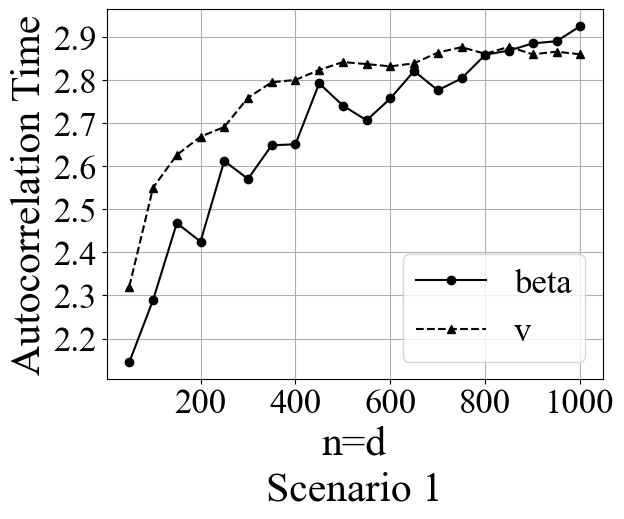

In [19]:
#probit n=d
temp = data[data.n==data.d][['n','t','tv']]
temp.n = temp.n.map(lambda x: int(x))
temp = temp.sort_values('n')
plt.plot(temp.n, temp.t, '-o', label='beta', color='black')
plt.plot(temp.n, temp.tv, '--^', label='v', color='black')
plt.grid()
plt.ylabel('Autocorrelation Time', fontsize=30)
plt.xlabel('n=d', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(prop={'size': 25})
plt.title('Scenario 1', y=-0.35, fontsize=30)
plt.savefig("plot/lasso1.png", dpi=300, bbox_inches='tight')

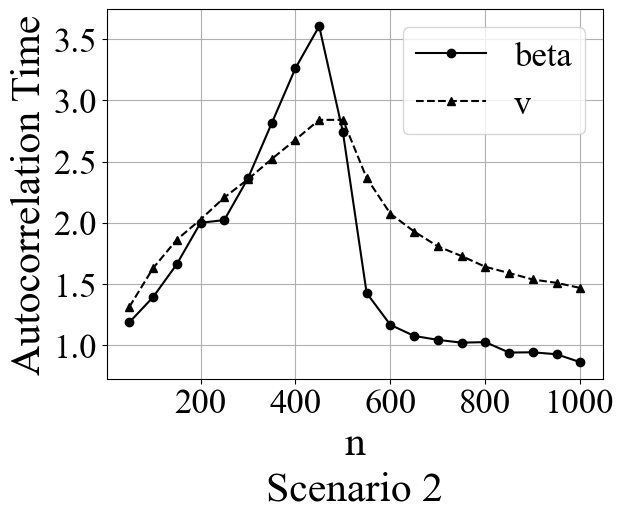

In [20]:
#probit n=d
temp = data[data.d=='500'][['n','t','tv']]
temp.n = temp.n.map(lambda x: int(x))
temp = temp.sort_values('n')
plt.plot(temp.n, temp.t, '-o', label='beta',color='black')
plt.plot(temp.n, temp.tv, '--^', label='v', color='black')
plt.grid()
plt.ylabel('Autocorrelation Time', fontsize=30)
plt.xlabel('n', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(prop={'size': 25})
plt.title('Scenario 2',  y=-0.35, fontsize=30)
plt.savefig("plot/lasso2.png", dpi=300, bbox_inches='tight')

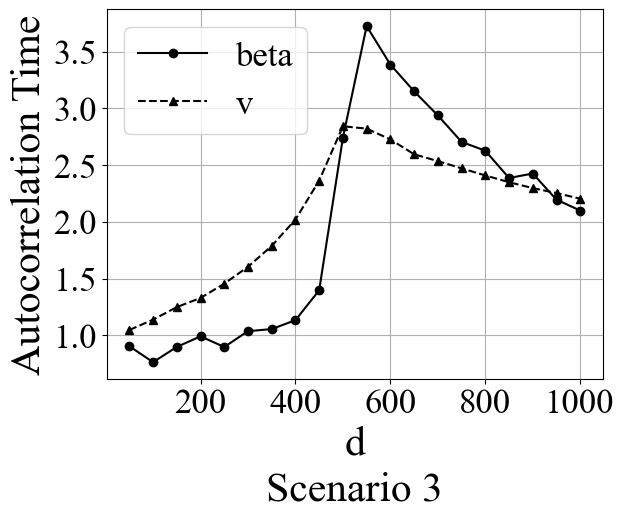

In [21]:
temp = data[data.n=='500'][['d','t','tv']]
temp.d = temp.d.map(lambda x: int(x))
temp = temp.sort_values('d')
plt.plot(temp.d, temp.t, '-o', label='beta', color='black')
plt.plot(temp.d, temp.tv, '--^', label='v', color='black')
plt.grid()
plt.ylabel('Autocorrelation Time', fontsize=30)
plt.xlabel('d', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(prop={'size': 25})
plt.title('Scenario 3', y=-0.35, fontsize = 30)
plt.savefig("plot/lasso3.png", dpi=300, bbox_inches='tight')